In [1]:
# !unzip mmwave-data.zip

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import special as sp
from scipy.stats import gaussian_kde
from scipy.io import loadmat
from sklearn.neighbors import KernelDensity
from scipy import special as sp
import warnings
warnings.filterwarnings('ignore')

# Data Load

## Small Scale Fading Data 

In [3]:
def SSF_mmdata_dB(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def SSF_mmdata_linear(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9


######################
#### LOAD PATH AB ####
######################
SSF_pathAB_dB = pd.DataFrame()
SSF_pathAB_dB['AP1'], SSF_pathAB_dB['AP2'], SSF_pathAB_dB['AP3'],\
 SSF_pathAB_dB['AP4'], SSF_pathAB_dB['AP5'], SSF_pathAB_dB['AP6'],\
  SSF_pathAB_dB['AP7'], SSF_pathAB_dB['AP8'], SSF_pathAB_dB['AP9'] = SSF_mmdata_dB('AB')

SSF_pathAB_linear = pd.DataFrame()
SSF_pathAB_linear['AP1'], SSF_pathAB_linear['AP2'], SSF_pathAB_linear['AP3'],\
 SSF_pathAB_linear['AP4'], SSF_pathAB_linear['AP5'], SSF_pathAB_linear['AP6'],\
  SSF_pathAB_linear['AP7'], SSF_pathAB_linear['AP8'], SSF_pathAB_linear['AP9'] = SSF_mmdata_linear('AB')


######################
#### LOAD PATH BA ####
######################
SSF_pathBA_dB = pd.DataFrame()
SSF_pathBA_dB['AP1'], SSF_pathBA_dB['AP2'], SSF_pathBA_dB['AP3'],\
 SSF_pathBA_dB['AP4'], SSF_pathBA_dB['AP5'], SSF_pathBA_dB['AP6'],\
  SSF_pathBA_dB['AP7'], SSF_pathBA_dB['AP8'], SSF_pathBA_dB['AP9'] = SSF_mmdata_dB('BA')

SSF_pathBA_linear = pd.DataFrame()
SSF_pathBA_linear['AP1'], SSF_pathBA_linear['AP2'], SSF_pathBA_linear['AP3'],\
 SSF_pathBA_linear['AP4'], SSF_pathBA_linear['AP5'], SSF_pathBA_linear['AP6'],\
  SSF_pathBA_linear['AP7'], SSF_pathBA_linear['AP8'], SSF_pathBA_linear['AP9'] = SSF_mmdata_linear('BA')

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(SSF_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(SSF_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(SSF_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(SSF_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-0.696300,-0.706977,-0.950157,-0.649444,-0.671172,-1.023778,-0.975409,-0.890574,-1.067207
std,3.827021,3.843941,4.345763,3.608783,3.657521,4.609185,4.428430,4.217900,4.628232
min,-28.257000,-26.160000,-30.613000,-26.990000,-29.916000,-29.998000,-27.744000,-24.949000,-26.882000
25%,-2.003200,-2.086100,-2.829525,-1.817875,-1.925500,-3.061450,-3.032250,-2.724975,-3.256600
50%,0.017756,-0.086271,-0.148310,-0.047697,-0.012861,-0.149310,-0.141100,-0.180765,-0.253520
75%,1.553000,1.488500,1.844975,1.316550,1.431450,1.974400,1.982550,1.821300,2.012050
max,8.209900,9.598300,9.200100,10.698000,9.334600,8.803300,9.140200,9.140100,9.516400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,0.998078,0.999170,0.994459,0.996652,0.996119,0.998034,0.996456,0.996790,0.996149
std,0.346952,0.361394,0.406651,0.340052,0.342458,0.428794,0.417400,0.402380,0.439500
min,0.038648,0.049204,0.029467,0.044717,0.031928,0.031630,0.041001,0.056568,0.045280
25%,0.794040,0.786490,0.721980,0.811160,0.801170,0.702955,0.705320,0.730723,0.687333
50%,1.002000,0.990120,0.983070,0.994525,0.998520,0.982960,0.983890,0.979400,0.971230
75%,1.195800,1.186900,1.236625,1.163675,1.179200,1.255200,1.256400,1.233275,1.260675
max,2.573300,3.019400,2.884100,3.426900,2.929100,2.755300,2.864200,2.864200,2.991000


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.141164,-1.154185,-1.201912,-1.197784,-1.120310,-1.244764,-1.132814,-1.108337,-1.219527
std,4.811502,4.821488,4.949272,4.950949,4.758712,5.050291,4.790806,4.782434,5.034982
min,-27.320000,-27.572000,-29.529000,-28.736000,-30.499000,-31.529000,-26.868000,-28.713000,-29.627000
25%,-3.625500,-3.761550,-3.749250,-3.664900,-3.414300,-3.908400,-3.468750,-3.467175,-3.835200
50%,-0.280440,-0.366350,-0.327530,-0.265050,-0.282530,-0.364120,-0.316615,-0.214105,-0.305010
75%,2.210025,2.240700,2.276500,2.249450,2.210200,2.357300,2.133950,2.137500,2.370900
max,10.524000,10.389000,10.315000,9.950700,9.385600,9.530000,10.148000,9.653300,10.109000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,0.997566,0.998390,0.998292,0.996041,0.994971,0.997650,0.996580,0.998705,0.999811
std,0.457868,0.468088,0.473801,0.460772,0.442697,0.477986,0.454135,0.453083,0.476423
min,0.043050,0.041821,0.033383,0.036578,0.029857,0.026520,0.045353,0.036673,0.033011
25%,0.658760,0.648515,0.649440,0.655775,0.674970,0.637650,0.670752,0.670878,0.643050
50%,0.968230,0.958700,0.962990,0.969950,0.968000,0.958950,0.964205,0.975650,0.965490
75%,1.289700,1.294300,1.299650,1.295600,1.289800,1.311800,1.278500,1.279025,1.313800
max,3.358700,3.307100,3.279200,3.144400,2.946300,2.995700,3.216800,3.038600,3.202300


## Composite (Small + Large) Scale Fading Data

In [4]:
def composite_mmdata_dB(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def composite_mmdata_linear(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

######################
#### LOAD PATH AB ####
######################
composite_pathAB_dB = pd.DataFrame()
composite_pathAB_dB['AP1'], composite_pathAB_dB['AP2'], composite_pathAB_dB['AP3'],\
 composite_pathAB_dB['AP4'], composite_pathAB_dB['AP5'], composite_pathAB_dB['AP6'],\
  composite_pathAB_dB['AP7'], composite_pathAB_dB['AP8'], composite_pathAB_dB['AP9'] = composite_mmdata_dB('AB')

composite_pathAB_linear = pd.DataFrame()
composite_pathAB_linear['AP1'], composite_pathAB_linear['AP2'], composite_pathAB_linear['AP3'],\
 composite_pathAB_linear['AP4'], composite_pathAB_linear['AP5'], composite_pathAB_linear['AP6'],\
  composite_pathAB_linear['AP7'], composite_pathAB_linear['AP8'], composite_pathAB_linear['AP9'] = composite_mmdata_linear('AB')


######################
#### LOAD PATH BA ####
######################
composite_pathBA_dB = pd.DataFrame()
composite_pathBA_dB['AP1'], composite_pathBA_dB['AP2'], composite_pathBA_dB['AP3'],\
 composite_pathBA_dB['AP4'], composite_pathBA_dB['AP5'], composite_pathBA_dB['AP6'],\
  composite_pathBA_dB['AP7'], composite_pathBA_dB['AP8'], composite_pathBA_dB['AP9'] = composite_mmdata_dB('BA')

composite_pathBA_linear = pd.DataFrame()
composite_pathBA_linear['AP1'], composite_pathBA_linear['AP2'], composite_pathBA_linear['AP3'],\
 composite_pathBA_linear['AP4'], composite_pathBA_linear['AP5'], composite_pathBA_linear['AP6'],\
  composite_pathBA_linear['AP7'], composite_pathBA_linear['AP8'], composite_pathBA_linear['AP9'] = composite_mmdata_linear('BA')

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(composite_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(composite_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(composite_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(composite_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-1.331243,-2.026816,-2.148211,-1.354591,-1.358023,-1.965932,-1.867219,-2.455355,-2.377686
std,5.555703,5.295770,5.622319,5.555328,5.270987,6.592554,5.370040,4.979277,5.386154
min,-34.977000,-35.591000,-37.205000,-33.143000,-34.196000,-36.296000,-32.348000,-32.857000,-32.103000
25%,-4.141100,-4.725900,-5.285100,-4.408050,-4.099150,-5.727400,-4.738550,-4.891600,-5.360025
50%,-0.597460,-1.021800,-1.318900,-0.049510,-0.654870,-1.528100,-0.982990,-1.590450,-1.507750
75%,2.620200,1.610700,1.786325,2.748350,1.862300,2.231150,1.945700,0.924527,1.539700
max,12.562000,9.626500,10.084000,9.553500,11.060000,13.356000,11.339000,9.054900,8.569400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,1.016877,0.921460,0.932225,1.008525,1.005849,1.035511,0.946677,0.863832,0.893894
std,0.547200,0.453448,0.513528,0.503199,0.564291,0.775473,0.486083,0.408087,0.462476
min,0.017830,0.016613,0.013796,0.022022,0.019507,0.015317,0.024133,0.022760,0.024821
25%,0.620790,0.580370,0.544185,0.602000,0.623795,0.517165,0.579525,0.569400,0.539513
50%,0.933530,0.889020,0.859125,0.994320,0.927380,0.838670,0.893000,0.832675,0.840645
75%,1.352150,1.203700,1.228300,1.372175,1.239150,1.292900,1.251050,1.112300,1.193975
max,4.247100,3.029200,3.193200,3.003800,3.572700,4.653600,3.689400,2.836300,2.682100


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.478477,-1.796911,-1.697986,-1.304056,-1.382989,-1.228730,-1.269627,-1.546466,-1.263962
std,5.612589,5.461735,5.331014,5.664596,5.709885,5.531827,5.590528,6.177197,5.595894
min,-29.275000,-30.195000,-29.306000,-31.022000,-35.014000,-30.264000,-29.162000,-32.034000,-29.974000
25%,-4.688175,-4.909150,-4.600750,-4.491600,-4.574200,-4.335100,-4.386750,-5.096475,-4.449900
50%,-0.726485,-1.062800,-0.846180,-0.413770,-0.738970,-0.424370,-0.462455,-0.927085,-0.411740
75%,2.475750,2.116600,2.084900,2.743400,2.576700,2.746100,2.654150,2.612550,2.782800
max,13.313000,12.184000,11.274000,13.101000,11.902000,10.764000,12.810000,14.148000,13.559000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,1.010464,0.963914,0.964883,1.029932,1.026995,1.030575,1.030587,1.047470,1.031002
std,0.577506,0.527819,0.503657,0.570421,0.595472,0.556338,0.572540,0.705591,0.566503
min,0.034377,0.030919,0.034252,0.028112,0.017754,0.030675,0.034824,0.025021,0.031717
25%,0.582895,0.568255,0.588795,0.596235,0.590590,0.607080,0.603480,0.556130,0.599110
50%,0.919760,0.884830,0.907180,0.953480,0.918440,0.952320,0.948150,0.898760,0.953700
75%,1.329775,1.275950,1.271300,1.371450,1.345300,1.371800,1.357425,1.350900,1.377700
max,4.630500,4.066500,3.661900,4.518900,3.936400,3.453000,4.370200,5.098000,4.763800


# Auxiliary Methods

In [5]:
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print("Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print("Toc: start time not set") 
        
# def KappaMuPDF(r, kappa, mu, omega):
#   '''
#   kappa-mu pdf.
#   '''
#   A = (2*mu * ((1 + kappa)**((mu+1)/2))) \
#           /(np.sqrt(omega) * (kappa**((mu-1)/2)) * np.exp(mu * kappa))
#   B = (r / np.sqrt(omega))**(mu)
#   C = np.exp(-mu*(1+kappa) * (r/np.sqrt(omega))**2)
#   D = sp.iv(mu-1, 2*mu * np.sqrt(kappa * (1+kappa)) * (r/np.sqrt(omega)))

#   pdf = A * B * C * D
#   return pdf

# def shadowedKappaMuPDF(r, kappa, mu, omega, md):
#   '''
#   shadowed kappa-mu pdf (type 1).
#   '''
#   A = 2 * r**((2*mu) -1) / omega**(mu)
#   B = (mu**mu * md**md * (1+kappa)**mu) / (sp.gamma(mu) * ((mu*kappa)+md)**md)
#   C = np.exp((- mu * (1+kappa) * r**2) / omega)
#   D = (mu**2) * kappa * (1+kappa) * (r**2)
#   E = ((mu*kappa)+md) * omega
#   F = sp.hyp1f1(md, mu, D / E)

#   pdf = A * B * C * F
#   return pdf

# def shadowedKappaMuPDF_t2(r, kappa, mu, r_hat, ms):
#   '''
#   shadowed kappa-mu pdf (type 2).
#   '''
#   A = 2 * ( ( ms - 1 ) ** ( ms ) ) * ( r ** ( ( 2 * mu ) - 1 ) )  * ( r_hat ** ( 2 * ms ) ) * ( ( 1 + kappa ) ** mu) * ( mu ** mu )
#   B = sp.beta(ms, mu ) * ( ( ( (r ** 2) * (1 + kappa) * mu ) + ( ( r_hat ** 2 ) * ( ms - 1 + (kappa * mu) ) ) ) ** ( mu + ms ) )
#   C = (ms+mu)/2
#   D = (1+ms+mu)/2
#   E = 4 * (mu**2) * kappa * (1 + kappa) * (r**2) * (r_hat**2)
#   F = ( ( (r**2) * (1 + kappa) * mu ) + ( ( r_hat**2 ) * ( ms - 1 + (kappa * mu) ) ) )**2
#   G = sp.hyp2f1( C, D, mu, E / F )

#   pdf = (A/B)*G
#   return pdf

def shadowedKappaMuPDF_t3(r, kappa, mu, r_hat, mt):
  '''
  shadowed kappa-mu pdf (type 3).
  '''
  A = 2 * ( ( 1 + kappa ) ** mu) * ( mu ** mu ) * math.exp( -kappa * mu ) * ( ( (mt - 1) * ( r_hat ** 2 ) )**( mt ) ) * ( r ** ( ( 2 * mu ) - 1 ) )
  B = sp.beta(mt, mu) * ( ( ( (r ** 2) * (1 + kappa) * mu ) + ( ( r_hat ** 2 ) * ( mt - 1 ) ) )**( mu + mt ) )
  C = (mt+mu)
  D = ( mu ** 2 ) * kappa * ( 1 + kappa ) * ( r**2)
  E = ( ( (r**2) * (1 + kappa) * mu ) + ( ( r_hat**2 ) * ( mt - 1 ) ) )
  F = sp.hyp1f1(C, mu, D/E )

  pdf = (A/B)*F
  return pdf

def kldiv(pVec1, pVec2):
  '''
  Kullback-Leibler divergence.
  '''
  KL = np.sum(pVec1*(np.log2(pVec1)-np.log2(pVec2)))
  return KL

def RAD(kldiv1, kldiv2):
  '''
  Resistor-Average Distance.
  '''
  RAD = 1/(1/kldiv1+1/kldiv2)
  return RAD


def fitness(X, Y, fitnessType, kappa, mu, omega):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Kappa Mu)
  '''
  if fitnessType == 'MSE':
    y_pred = KappaMuPDF(X, kappa, mu, omega)
    n = len(Y)
    cost = 1/n * sum(val**2 for val in (Y-y_pred))
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = KappaMuPDF(X, kappa, mu, omega)/np.sum(KappaMuPDF(X, kappa, mu, omega))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost

def getDensityEstimationSamples(linear_data, nExtractedSamples, path, nAP):
  '''
  Extracted KDE uniformly spaced samples from the data.
  '''
  Xdata = np.linspace(linear_data.min(), linear_data.max(), nExtractedSamples).reshape(-1, 1)
  kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(linear_data.values.reshape(-1, 1))
  
  logkde = kde.score_samples(Xdata)
  Ydata = np.exp(logkde).reshape(-1,1)
  plt.figure(figsize=(10,7))
  plt.scatter(20*np.log10(Xdata), Ydata, c='magenta')
  plt.title(f'Path {path} | RX: {nAP}')
  plt.ylabel('Density')
  plt.xlabel('Small Scale Fading (dB)')
  plt.grid()
  plt.show()
  return Xdata, Ydata

def printSummary(path, nAP, fitnessType):
  print('='*30+'\n'+'Genetic Algorithm Fitting\nFitness Type: {}\nPath: {}\nRX: {}\n'.format(fitnessType, path, nAP))

def computeAIC(data, n, K, mle_sku, ga_sku_mse, ga_sku_rad):

    # AIC MLE - SHADOWED KAPPA MU T3
    sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, mle_sku[0], mle_sku[1], mle_sku[2], mle_sku[3]).astype(float)))
    AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    # AIC GENETIC ALGORITHM SHADOWED KAPPA MU T3 - FITNESS: MSE
    sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, ga_sku_mse[0], ga_sku_mse[1], ga_sku_mse[2], ga_sku_mse[3])))
    AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    # AIC GENETIC ALGORITHM SHADOWED KAPPA MU T3 - FITNESS: RAD
    sum = np.sum(np.log(shadowedKappaMuPDF_t3(data, ga_sku_rad[0], ga_sku_rad[1], ga_sku_rad[2], ga_sku_rad[3])))
    AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


    rads = {'Methods':['MLE - Shad. KappaMu T3', 'GA - Shad. KappaMu T3 (Fitness = MSE)',\
                       'GA - Shad. KappaMu T3 (Fitness = RAD)'],
        'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
    
    df = pd.DataFrame(rads)
    display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))
    
    return df

def plotResults(Xdata, Ydata, sku_pdf, ga_sku_mse, ga_sku_rad, path, nAP):
    
    if not os.path.exists('plots_skut3'):
        os.makedirs('plots_skut3')
    
    plt.figure(figsize=((10,7)))
    plt.scatter(20*np.log10(Xdata), Ydata, c='black')
    plt.plot(20*np.log10(Xdata), sku_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (Type 3) MLE')
    plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, ga_sku_mse[0], ga_sku_mse[1], ga_sku_mse[2], ga_sku_mse[3]), label='GA: Shad. $\kappa$-$\mu$ (Type 3) (MSE)', c='red')
    plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t3(Xdata, ga_sku_rad[0], ga_sku_rad[1], ga_sku_rad[2], ga_sku_rad[3]), label='GA: Shad. $\kappa$-$\mu$ (Type 3) (RAD)', c='green')
    plt.title(f'Path {path} | RX: {nAP}')
    plt.legend()
    plt.grid(True)
    plt.xlabel(r'Composite Scale Fading (dB)')
    plt.ylabel('Density')
    plt.savefig('plots_skut3/sku-t3_path{}_ap{}.pdf'.format(path, nAP), dpi=150)
    plt.show()

    plt.figure(figsize=((10,7)))
    plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
    plt.plot(20*np.log10(Xdata), 20*np.log10(sku_pdf.astype(float)), c='blue', label=r'Shad. $\kappa$-$\mu$ (Type 3) MLE')
    plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, ga_sku_mse[0], ga_sku_mse[1], ga_sku_mse[2], ga_sku_mse[3])), label='GA: Shad. $\kappa$-$\mu$ (Type 3) (MSE)', c='red')
    plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t3(Xdata, ga_sku_rad[0], ga_sku_rad[1], ga_sku_rad[2], ga_sku_rad[3])), label='GA: Shad. $\kappa$-$\mu$ (Type 3) (RAD)', c='green')
    plt.title(f'Path {path} | RX: {nAP}')
    plt.legend()
    plt.grid(True)
    plt.xlabel(r'Composite Scale Fading (dB)')
    plt.ylabel('Log Density')
    plt.savefig('plots_skut3/sku-t3_path{}_ap{} - log.pdf'.format(path, nAP), dpi=150)
    plt.show()

In [6]:
def fitness_sku(X, Y, fitnessType, kappa, mu, omega, mt):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Shadowed Kappa Mu Type 3)
  '''
  if fitnessType == 'MSE':
    y_pred = shadowedKappaMuPDF_t3(X, kappa, mu, omega, mt)
    n = len(Y)
    sum = []
    for val in (Y-y_pred):
      sum.append(val**2)
    sum = np.sum(sum)
    cost = 1/n * sum
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = shadowedKappaMuPDF_t3(X, kappa, mu, omega, mt)/np.sum(shadowedKappaMuPDF_t3(X, kappa, mu, omega, mt))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost


def geneticAlgorithm_sku(X, Y, threshold, firstFlag=True):
  '''
  Genetic Algorithm incorporating Shadowed Kappa Mu Type 3 in the Fitness Function
  It fits kappa, mu, omega, mt
  '''
  if firstFlag:
        tic()
  solutions = []
  bestParams = []
  bestCriteria = 0
  bestGen = 0


  # Generate solutions (chromossomes)
  for s in range(nPopulation):
    solutions.append((random.uniform(0.001, 70), # kappa
                        random.uniform(0.01, 3.0), # mu
                        random.uniform(0.01, 2.5), # r_hat
                        random.uniform(1.001, 100))) # mt

  # Evolutionary Loop
  for i in range(nMaxGen):
    rankedSolutions = []
    for s in solutions:
      rankedSolutions.append( (fitness_sku(X, Y, fitnessType, s[0],s[1],s[2],s[3]), s) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
    
    # print(f'=== Generation: {i} === ')
    # print(f'Fitness: {rankedSolutions[0][0]}')
    # print('Best individual:')
    # print(f'Kappa: {rankedSolutions[0][1][0]}')
    # print(f'Mu: {rankedSolutions[0][1][1]}')
    # print(f'Omega: {rankedSolutions[0][1][2]}')
    # print(f'Mt: {rankedSolutions[0][1][3]}\n')

    # Keeping track the best paramt and generation:
    if rankedSolutions[0][0] > bestCriteria:
      bestCriteria = rankedSolutions[0][0]
      bestGen = i
      bestParams = rankedSolutions[0][1]

    # Check if it is good enough according to a satisfactory threshold:
    if bestCriteria > threshold:
      print('Satisfactory Threshold reached!')  
      toc()
      print('\nBest Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
      print('Kappa: {}\nMu: {}\nR_hat: {}\nMt: {}'.format(bestParams[0],bestParams[1],bestParams[2],bestParams[3]))
      return bestParams[0],bestParams[1],bestParams[2],bestParams[3]
    
    # Combine the best solutions and make a new solution of those combined solutions
    bestSolutions = rankedSolutions[:100]
    elements_kappa = []
    elements_mu = []
    elements_r_hat = [] 
    elements_mt = [] 
    for s in bestSolutions:
      elements_kappa.append(s[1][0])
      elements_mu.append(s[1][1])
      elements_r_hat.append(s[1][2])
      elements_mt.append(s[1][3])

    newGen = []
    for _ in range(nPopulation):
      e1 = random.choice(elements_kappa) * random.uniform(0.975,1.025) # Mutation of 5%
      e2 = random.choice(elements_mu) * random.uniform(0.975,1.025) # Mutation of 5%
      e3 = random.choice(elements_r_hat) * random.uniform(0.975,1.025) # Mutation of 5%
      e4 = random.choice(elements_mt) * random.uniform(0.975,1.025) # Mutation of 5%
      
      newGen.append((e1,e2,e3,e4))

    solutions = newGen
    
    if i == nMaxGen-1:
      print('Max number of generations reached! (Possible bad initialization)\nRestarting...\n')
      b0, b1, b2, b3 = geneticAlgorithm_sku(X, Y, threshold, False)
        
      return b0, b1, b2, b3

# Composite Fading Fitting (PARAMETERS)

In [7]:
### PARAMETERS
nMaxGen = 200
nPopulation = 1000
nExtractedSamples = 81

## Shadowed $\kappa$-$\mu$ (type 3) - Path: AB

In [8]:
path = 'AB'

### AP 1

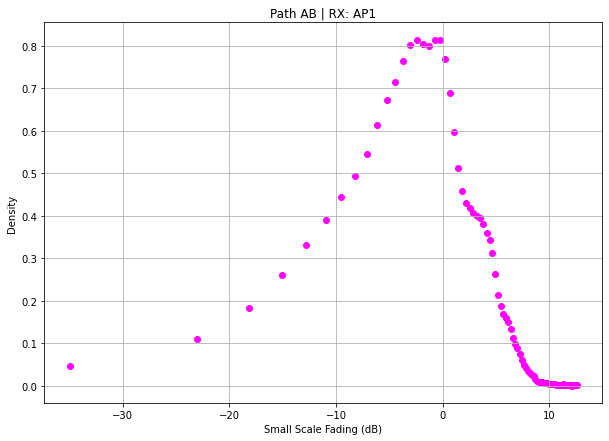

In [9]:
nAP = 'AP1'
estParameters_pathAB_ap1 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [10]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 1185)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 243)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP1

Satisfactory Threshold reached!
Elapsed time is 35.74100995063782 seconds.

Best Fitness: 1185.4889343699583
Best Gen: 154
Kappa: 1.7261779504358317
Mu: 0.8807248865439231
R_hat: 1.222047793232865
Mt: 3.052451334201915
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP1

Satisfactory Threshold reached!
Elapsed time is 25.529985904693604 seconds.

Best Fitness: 243.07330037054555
Best Gen: 143
Kappa: 0.6067567143757956
Mu: 0.9865584451882236
R_hat: 1.1556183260499389
Mt: 8.136669566131475


#### Estimated Parameters

In [11]:
mle_sku_t3_pathAB_ap1 = [1.9366, 0.84431, 1.2258, 2.9567]

estParameters_pathAB_ap1['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathAB_ap1
estParameters_pathAB_ap1['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathAB_ap1['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathAB_ap1 = estParameters_pathAB_ap1.set_index(index)
estParameters_pathAB_ap1

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,1.93660,1.726178,0.606757
mu,0.84431,0.880725,0.986558
r_hat,1.22580,1.222048,1.155618
mt,2.95670,3.052451,8.136670


#### Plots

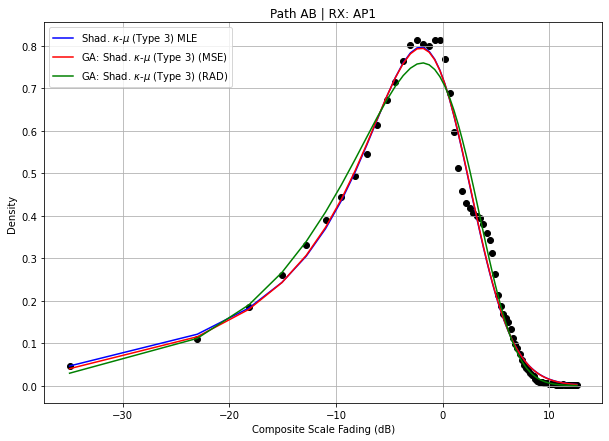

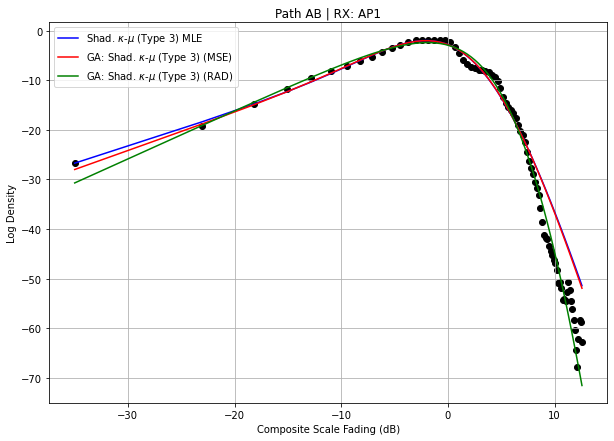

In [12]:
sku_t3_AB_ap1_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap1[0], mle_sku_t3_pathAB_ap1[1], mle_sku_t3_pathAB_ap1[2], mle_sku_t3_pathAB_ap1[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_AB_ap1_pdf,\
     estParameters_pathAB_ap1['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathAB_ap1['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [13]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap1 = computeAIC(data, n, K,\
                            mle_sku_t3_pathAB_ap1,\
                            estParameters_pathAB_ap1['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathAB_ap1['GA: Shad. KappaMu T3 - RAD'])

Path: AB
RX: AP1


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = RAD),31904.969967
1,GA - Shad. KappaMu T3 (Fitness = MSE),32209.008340
2,MLE - Shad. KappaMu T3,32240.304398


### AP 2

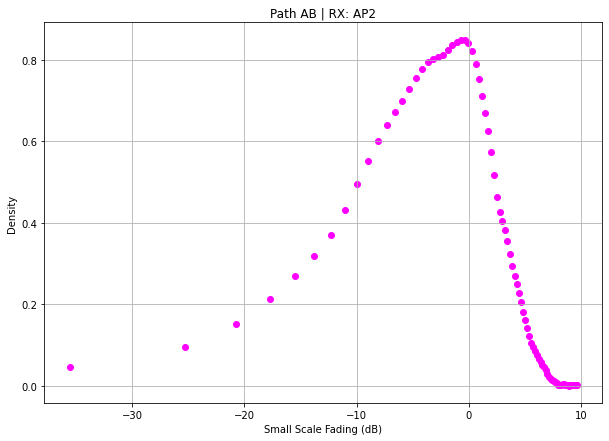

In [14]:
nAP = 'AP2'
estParameters_pathAB_ap2 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [15]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 3366)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 1109)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP2

Satisfactory Threshold reached!
Elapsed time is 24.055218935012817 seconds.

Best Fitness: 3367.7412270420828
Best Gen: 112
Kappa: 1.144432402530899
Mu: 0.9228482766660598
R_hat: 1.0320871836251595
Mt: 16.51253321261881
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP2

Satisfactory Threshold reached!
Elapsed time is 13.847191333770752 seconds.

Best Fitness: 1112.383194045225
Best Gen: 75
Kappa: 1.0298938137995817
Mu: 0.9389659254563226
R_hat: 1.028499947676918
Mt: 24.482571159275224


#### Estimated Parameters

In [16]:
mle_sku_t3_pathAB_ap2 = [1.0565, 0.93392, 1.0277, 23.776]

estParameters_pathAB_ap2['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathAB_ap2
estParameters_pathAB_ap2['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathAB_ap2['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathAB_ap2 = estParameters_pathAB_ap2.set_index(index)
estParameters_pathAB_ap2

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,1.05650,1.144432,1.029894
mu,0.93392,0.922848,0.938966
r_hat,1.02770,1.032087,1.028500
mt,23.77600,16.512533,24.482571


#### Plots

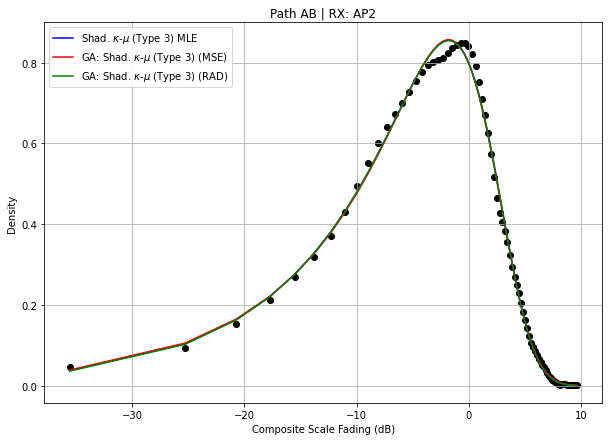

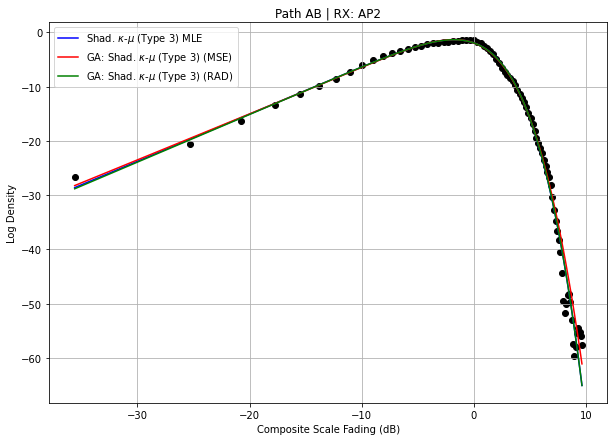

In [17]:
sku_t3_AB_ap2_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap2[0], mle_sku_t3_pathAB_ap2[1], mle_sku_t3_pathAB_ap2[2], mle_sku_t3_pathAB_ap2[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_AB_ap2_pdf,\
     estParameters_pathAB_ap2['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathAB_ap2['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [18]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap2 = computeAIC(data, n, K,\
                            mle_sku_t3_pathAB_ap2,\
                            estParameters_pathAB_ap2['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathAB_ap2['GA: Shad. KappaMu T3 - RAD'])

Path: AB
RX: AP2


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = RAD),20801.770767
1,MLE - Shad. KappaMu T3,20802.724084
2,GA - Shad. KappaMu T3 (Fitness = MSE),20811.955903


### AP 3

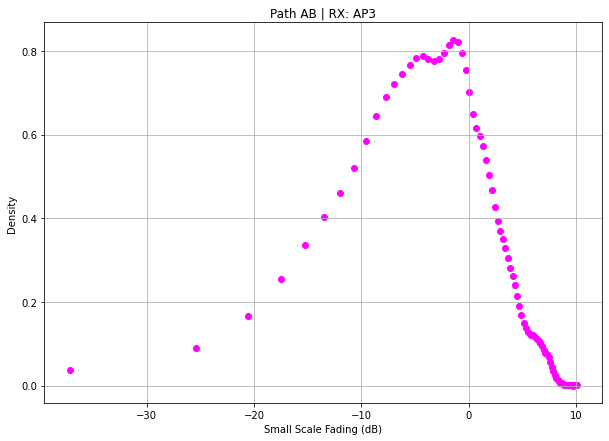

In [19]:
nAP = 'AP3'
estParameters_pathAB_ap3 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [20]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 3018)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 212)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP3

Satisfactory Threshold reached!
Elapsed time is 25.433515310287476 seconds.

Best Fitness: 3018.2368049447377
Best Gen: 122
Kappa: 0.5837903924782482
Mu: 0.9837155327371525
R_hat: 1.0893365913159527
Mt: 4.787295404736079
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP3

Satisfactory Threshold reached!
Elapsed time is 16.17304539680481 seconds.

Best Fitness: 212.0272464535585
Best Gen: 111
Kappa: 0.09154291647865205
Mu: 0.9680216912719652
R_hat: 1.0622444593987321
Mt: 17.967971116970038


#### Estimated Parameters

In [21]:
mle_sku_t3_pathAB_ap3 = [0.58654, 0.98284, 1.0899, 4.7946]

estParameters_pathAB_ap3['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathAB_ap3
estParameters_pathAB_ap3['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathAB_ap3['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathAB_ap3 = estParameters_pathAB_ap3.set_index(index)
estParameters_pathAB_ap3

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,0.58654,0.583790,0.091543
mu,0.98284,0.983716,0.968022
r_hat,1.08990,1.089337,1.062244
mt,4.79460,4.787295,17.967971


#### Plots

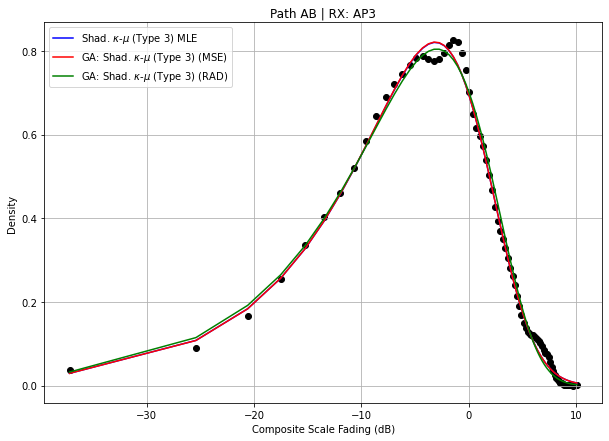

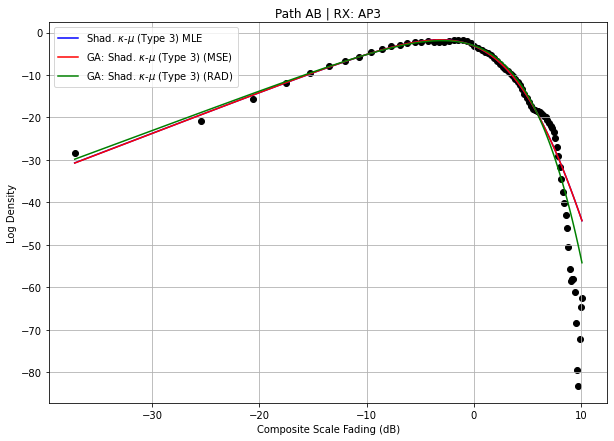

In [22]:
sku_t3_AB_ap3_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap3[0], mle_sku_t3_pathAB_ap3[1], mle_sku_t3_pathAB_ap3[2], mle_sku_t3_pathAB_ap3[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_AB_ap3_pdf,\
     estParameters_pathAB_ap3['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathAB_ap3['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [23]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap3 = computeAIC(data, n, K,\
                            mle_sku_t3_pathAB_ap3,\
                            estParameters_pathAB_ap3['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathAB_ap3['GA: Shad. KappaMu T3 - RAD'])

Path: AB
RX: AP3


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = RAD),28844.213307
1,GA - Shad. KappaMu T3 (Fitness = MSE),28971.355365
2,MLE - Shad. KappaMu T3,28971.740057


### AP 4

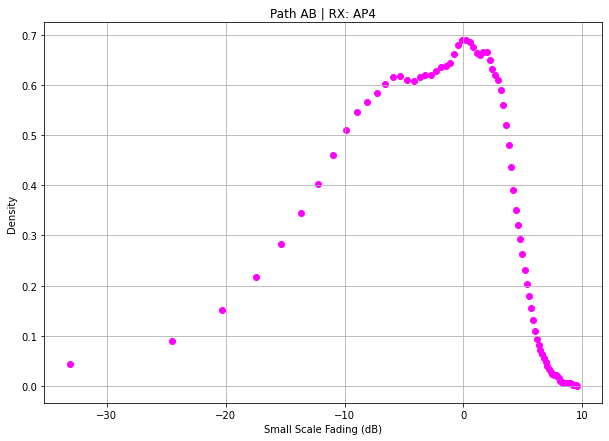

In [24]:
nAP = 'AP4'
estParameters_pathAB_ap4 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [25]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 550)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 186)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP4

Satisfactory Threshold reached!
Elapsed time is 5.421050548553467 seconds.

Best Fitness: 550.6100865055695
Best Gen: 22
Kappa: 1.155875922290389
Mu: 0.8052051959582951
R_hat: 1.1579896247837573
Mt: 117.42967362727751
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP4

Satisfactory Threshold reached!
Elapsed time is 4.561475992202759 seconds.

Best Fitness: 186.4166996759925
Best Gen: 18
Kappa: 1.1697956798782863
Mu: 0.847298942323965
R_hat: 1.1294883263505915
Mt: 112.62298047777378


#### Estimated Parameters

In [26]:
mle_sku_t3_pathAB_ap4 = [1.2136, 0.79397, 1.1589, 100]

estParameters_pathAB_ap4['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathAB_ap4
estParameters_pathAB_ap4['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathAB_ap4['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathAB_ap4 = estParameters_pathAB_ap4.set_index(index)
estParameters_pathAB_ap4

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,1.21360,1.155876,1.169796
mu,0.79397,0.805205,0.847299
r_hat,1.15890,1.157990,1.129488
mt,100.00000,117.429674,112.622980


#### Plots

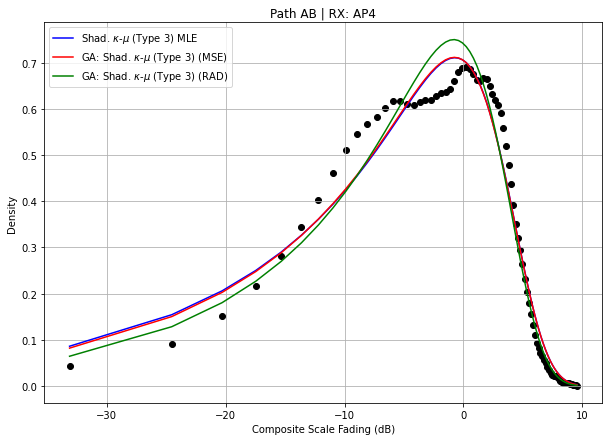

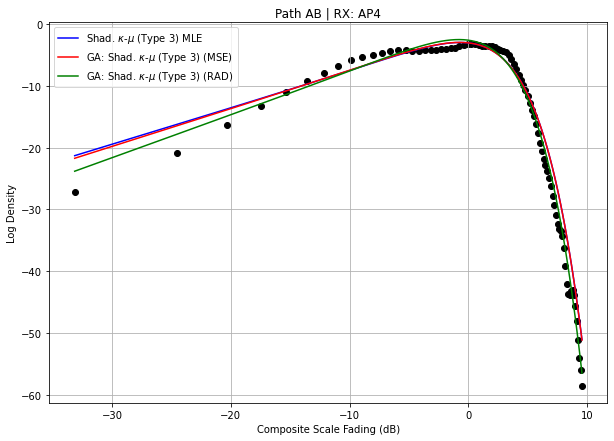

In [27]:
sku_t3_AB_ap4_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap4[0], mle_sku_t3_pathAB_ap4[1], mle_sku_t3_pathAB_ap4[2], mle_sku_t3_pathAB_ap4[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_AB_ap4_pdf,\
     estParameters_pathAB_ap4['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathAB_ap4['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [28]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap4 = computeAIC(data, n, K,\
                            mle_sku_t3_pathAB_ap4,\
                            estParameters_pathAB_ap4['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathAB_ap4['GA: Shad. KappaMu T3 - RAD'])

Path: AB
RX: AP4


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = RAD),27626.116396
1,GA - Shad. KappaMu T3 (Fitness = MSE),27752.872548
2,MLE - Shad. KappaMu T3,27764.327251


### AP 5

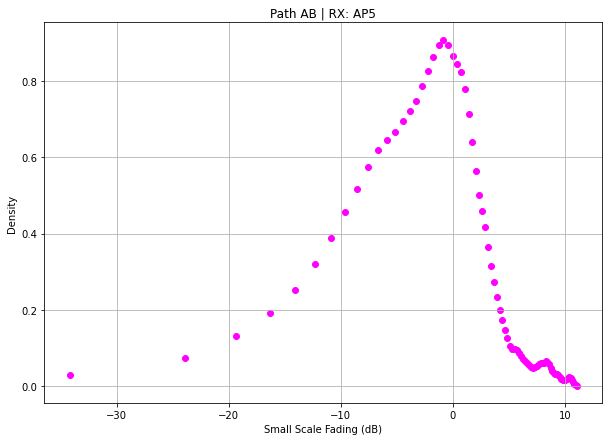

In [29]:
nAP = 'AP5'
estParameters_pathAB_ap5 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [30]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 741)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 90)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP5

Satisfactory Threshold reached!
Elapsed time is 6.455469131469727 seconds.

Best Fitness: 741.2502403017356
Best Gen: 28
Kappa: 1.9933547912969554
Mu: 0.839744624706801
R_hat: 1.054628800305486
Mt: 8.627177132223634
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP5

Satisfactory Threshold reached!
Elapsed time is 1.9056370258331299 seconds.

Best Fitness: 90.45418000567189
Best Gen: 6
Kappa: 2.4460836686164114
Mu: 0.874988762128789
R_hat: 1.1812045011984358
Mt: 2.759504991457808


#### Estimated Parameters

In [31]:
mle_sku_t3_pathAB_ap5 = [1.9876, 0.83913, 1.0512, 9.1532]

estParameters_pathAB_ap5['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathAB_ap5
estParameters_pathAB_ap5['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathAB_ap5['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathAB_ap5 = estParameters_pathAB_ap5.set_index(index)
estParameters_pathAB_ap5

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,1.98760,1.993355,2.446084
mu,0.83913,0.839745,0.874989
r_hat,1.05120,1.054629,1.181205
mt,9.15320,8.627177,2.759505


#### Plots

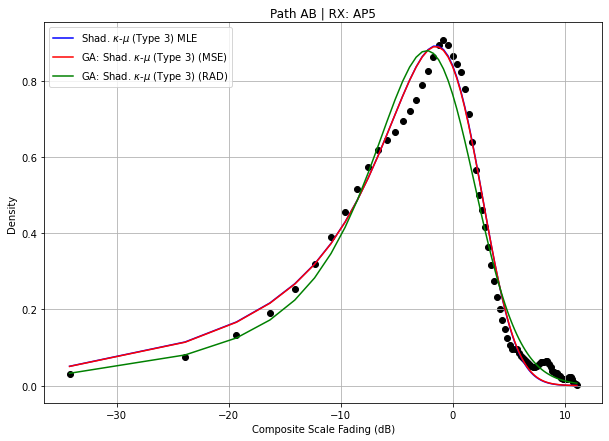

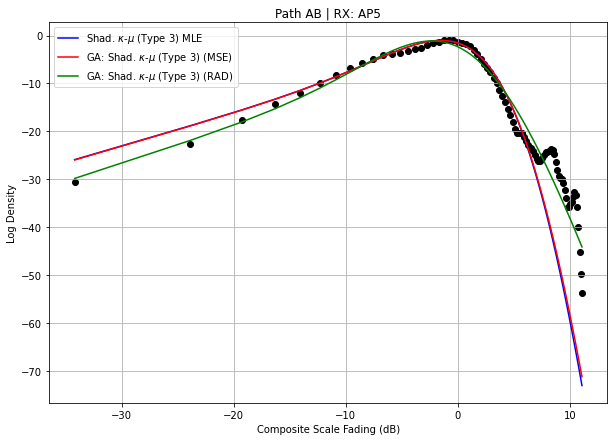

In [32]:
sku_t3_AB_ap5_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap5[0], mle_sku_t3_pathAB_ap5[1], mle_sku_t3_pathAB_ap5[2], mle_sku_t3_pathAB_ap5[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_AB_ap5_pdf,\
     estParameters_pathAB_ap5['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathAB_ap5['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [33]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap5 = computeAIC(data, n, K,\
                            mle_sku_t3_pathAB_ap5,\
                            estParameters_pathAB_ap5['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathAB_ap5['GA: Shad. KappaMu T3 - RAD'])

Path: AB
RX: AP5


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = RAD),26977.967310
1,GA - Shad. KappaMu T3 (Fitness = MSE),28311.474472
2,MLE - Shad. KappaMu T3,28451.073734


### AP 6

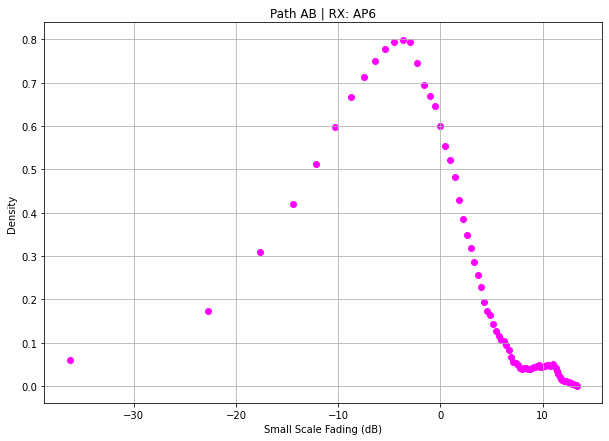

In [34]:
nAP = 'AP6'
estParameters_pathAB_ap6 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [35]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 4250)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 123)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP6

Satisfactory Threshold reached!
Elapsed time is 15.440668106079102 seconds.

Best Fitness: 4250.433648345314
Best Gen: 72
Kappa: 1.0873579865035807
Mu: 0.8937780817462017
R_hat: 1.3671316330096264
Mt: 1.6961866370630176
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP6

Satisfactory Threshold reached!
Elapsed time is 15.37604284286499 seconds.

Best Fitness: 123.72966199795854
Best Gen: 72
Kappa: 2.404687752363432
Mu: 0.7500328381840614
R_hat: 1.7415146535449875
Mt: 1.2903400306110726


#### Estimated Parameters

In [36]:
mle_sku_t3_pathAB_ap6 = [1.0872, 0.89312, 1.3687, 1.6933]

estParameters_pathAB_ap6['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathAB_ap6
estParameters_pathAB_ap6['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathAB_ap6['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathAB_ap6 = estParameters_pathAB_ap6.set_index(index)
estParameters_pathAB_ap6

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,1.08720,1.087358,2.404688
mu,0.89312,0.893778,0.750033
r_hat,1.36870,1.367132,1.741515
mt,1.69330,1.696187,1.290340


#### Plots

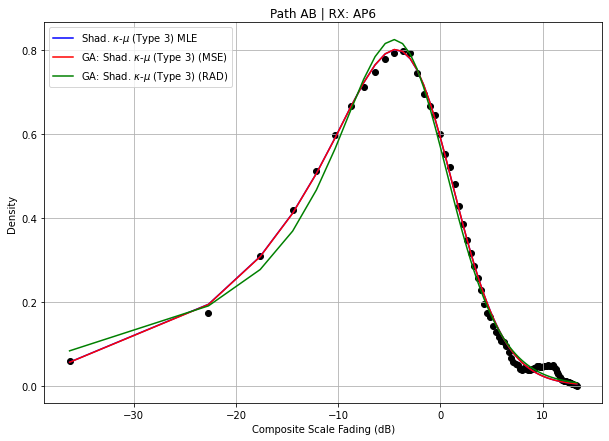

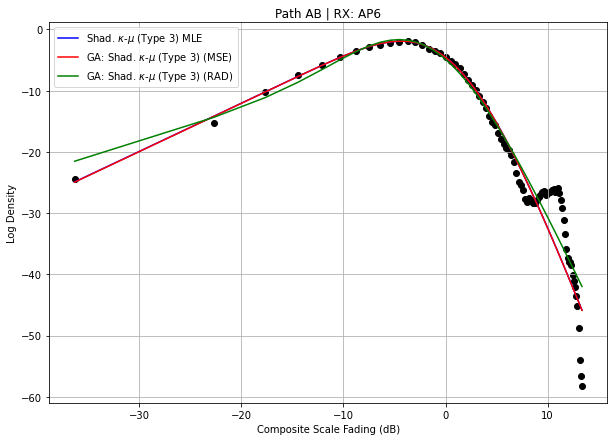

In [37]:
sku_t3_AB_ap6_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap6[0], mle_sku_t3_pathAB_ap6[1], mle_sku_t3_pathAB_ap6[2], mle_sku_t3_pathAB_ap6[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_AB_ap6_pdf,\
     estParameters_pathAB_ap6['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathAB_ap6['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [38]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap6 = computeAIC(data, n, K,\
                            mle_sku_t3_pathAB_ap6,\
                            estParameters_pathAB_ap6['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathAB_ap6['GA: Shad. KappaMu T3 - RAD'])

Path: AB
RX: AP6


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = MSE),31165.079307
1,MLE - Shad. KappaMu T3,31165.082640
2,GA - Shad. KappaMu T3 (Fitness = RAD),31340.212781


### AP 7

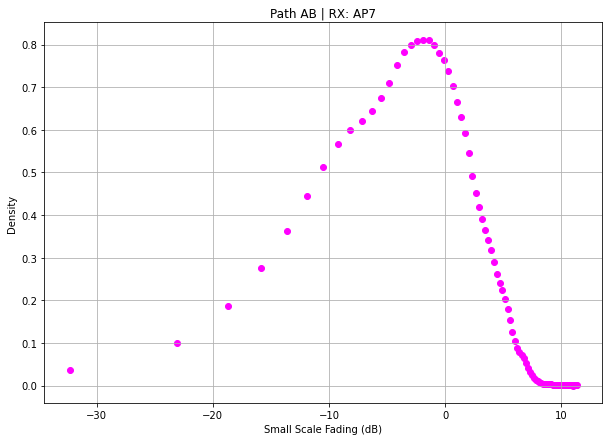

In [39]:
nAP = 'AP7'
estParameters_pathAB_ap7 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [40]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 4622)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 832)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP7

Satisfactory Threshold reached!
Elapsed time is 22.29719066619873 seconds.

Best Fitness: 4622.622018669774
Best Gen: 105
Kappa: 0.7542370861742924
Mu: 0.9507888984368126
R_hat: 1.0808187394893303
Mt: 10.732285488293495
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP7

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 44.7280638217926 seconds.

Best Fitness: 832.2604283146552
Best Gen: 32
Kappa: 0.3628658552578096
Mu: 0.9929620563521077
R_hat: 1.0655948364754881
Mt: 105.45458363035804


#### Estimated Parameters

In [41]:
mle_sku_t3_pathAB_ap7 = [0.58883, 0.96639, 1.0735, 16.723]

estParameters_pathAB_ap7['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathAB_ap7
estParameters_pathAB_ap7['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathAB_ap7['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathAB_ap7 = estParameters_pathAB_ap7.set_index(index)
estParameters_pathAB_ap7

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,0.58883,0.754237,0.362866
mu,0.96639,0.950789,0.992962
r_hat,1.07350,1.080819,1.065595
mt,16.72300,10.732285,105.454584


#### Plots

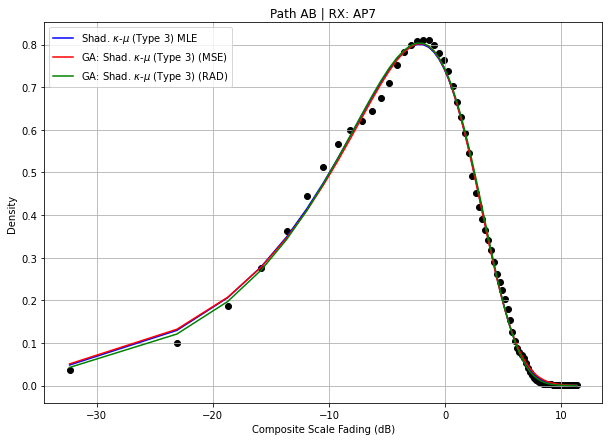

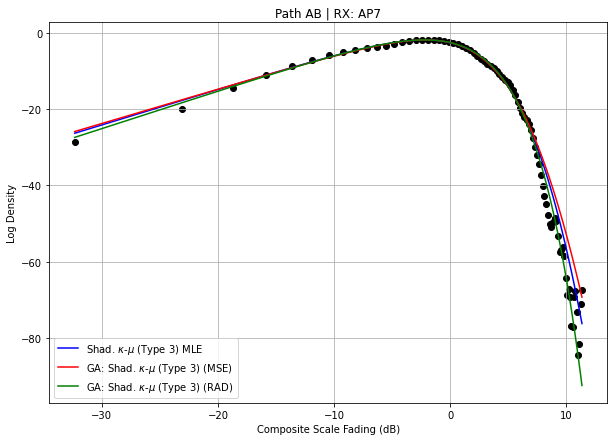

In [42]:
sku_t3_AB_ap7_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap7[0], mle_sku_t3_pathAB_ap7[1], mle_sku_t3_pathAB_ap7[2], mle_sku_t3_pathAB_ap7[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_AB_ap7_pdf,\
     estParameters_pathAB_ap7['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathAB_ap7['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [43]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap7 = computeAIC(data, n, K,\
                            mle_sku_t3_pathAB_ap7,\
                            estParameters_pathAB_ap7['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathAB_ap7['GA: Shad. KappaMu T3 - RAD'])

Path: AB
RX: AP7


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = RAD),24148.466940
1,MLE - Shad. KappaMu T3,24190.916224
2,GA - Shad. KappaMu T3 (Fitness = MSE),24237.233450


### AP 8

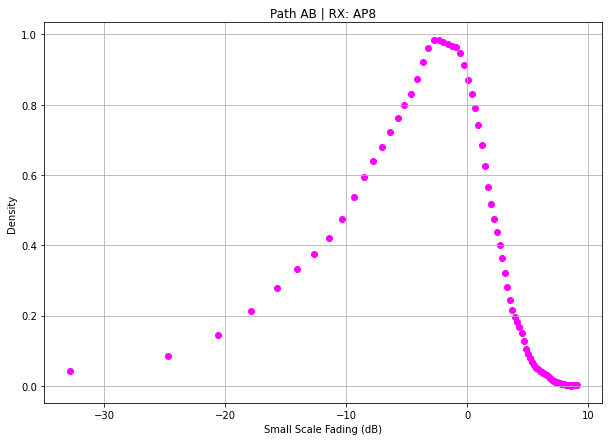

In [44]:
nAP = 'AP8'
estParameters_pathAB_ap8 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [45]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 5705)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 1664)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP8

Satisfactory Threshold reached!
Elapsed time is 13.412501811981201 seconds.

Best Fitness: 5713.014810667867
Best Gen: 61
Kappa: 1.8709544118605563
Mu: 0.8590448647464546
R_hat: 0.9484627185029433
Mt: 15.127455247433772
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP8

Satisfactory Threshold reached!
Elapsed time is 21.58583974838257 seconds.

Best Fitness: 1664.2549188317496
Best Gen: 117
Kappa: 1.642010390893985
Mu: 0.9239429351639799
R_hat: 0.9576230060833366
Mt: 11.0351233532006


#### Estimated Parameters

In [46]:
mle_sku_t3_pathAB_ap8 = [1.7546, 0.88092, 0.94775, 17.168]

estParameters_pathAB_ap8['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathAB_ap8
estParameters_pathAB_ap8['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathAB_ap8['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathAB_ap8 = estParameters_pathAB_ap8.set_index(index)
estParameters_pathAB_ap8

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,1.75460,1.870954,1.642010
mu,0.88092,0.859045,0.923943
r_hat,0.94775,0.948463,0.957623
mt,17.16800,15.127455,11.035123


#### Plots

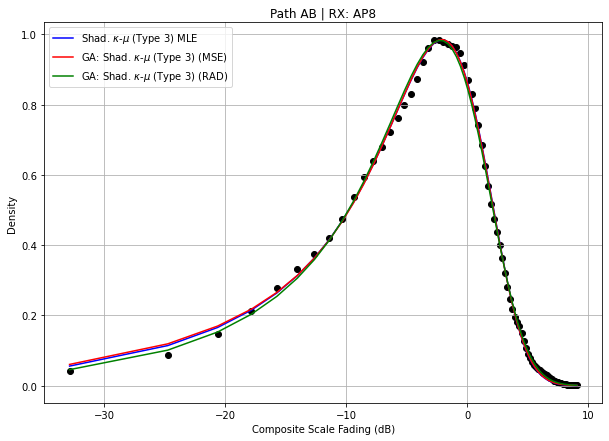

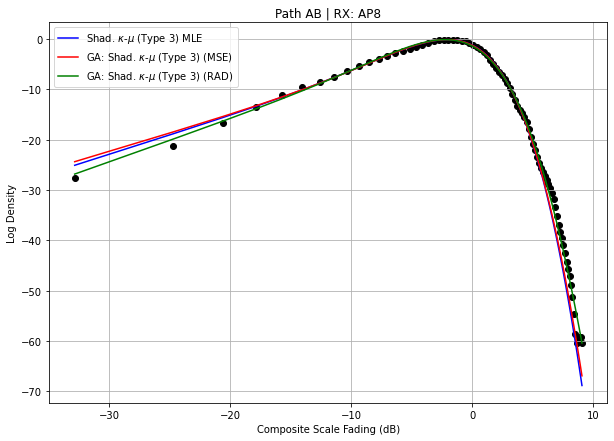

In [47]:
sku_t3_AB_ap8_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap8[0], mle_sku_t3_pathAB_ap8[1], mle_sku_t3_pathAB_ap8[2], mle_sku_t3_pathAB_ap8[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_AB_ap8_pdf,\
     estParameters_pathAB_ap8['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathAB_ap8['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [48]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap8 = computeAIC(data, n, K,\
                            mle_sku_t3_pathAB_ap8,\
                            estParameters_pathAB_ap8['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathAB_ap8['GA: Shad. KappaMu T3 - RAD'])

Path: AB
RX: AP8


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = RAD),18093.002007
1,GA - Shad. KappaMu T3 (Fitness = MSE),18130.852372
2,MLE - Shad. KappaMu T3,18133.293648


### AP 9

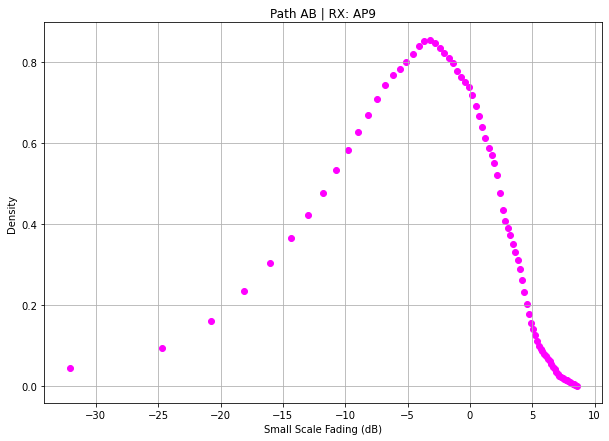

In [49]:
nAP = 'AP9'
estParameters_pathAB_ap9 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [50]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 6324)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 2309)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP9

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 45.401636838912964 seconds.

Best Fitness: 6624.024198340743
Best Gen: 4
Kappa: 0.08080649777914167
Mu: 1.0075985005838377
R_hat: 1.0120752230027492
Mt: 37.161674765839535
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP9

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 76.90865087509155 seconds.

Best Fitness: 2309.290713704796
Best Gen: 30
Kappa: 0.3104958151678936
Mu: 0.99903350239603
R_hat: 1.0109631218239248
Mt: 38.95465557763673


#### Estimated Parameters

In [51]:
mle_sku_t3_pathAB_ap9 = [0.15736, 0.99008, 1.0133, 100]

estParameters_pathAB_ap9['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathAB_ap9
estParameters_pathAB_ap9['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathAB_ap9['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathAB_ap9 = estParameters_pathAB_ap9.set_index(index)
estParameters_pathAB_ap9

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,0.15736,0.080806,0.310496
mu,0.99008,1.007599,0.999034
r_hat,1.01330,1.012075,1.010963
mt,100.00000,37.161675,38.954656


#### Plots

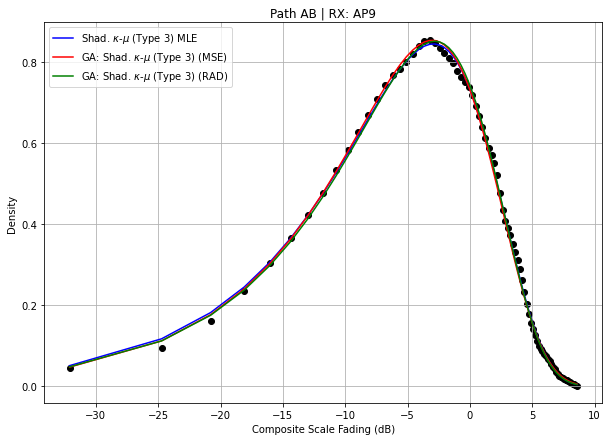

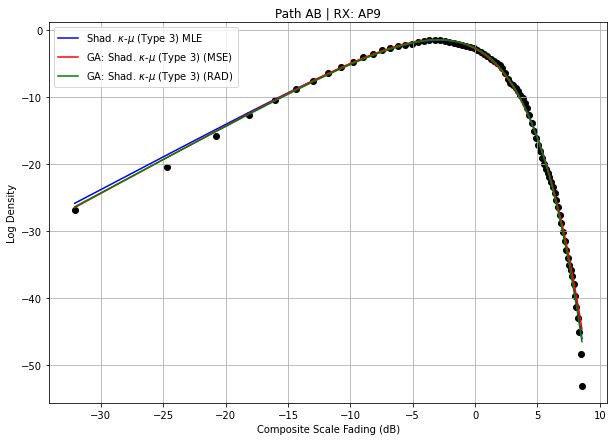

In [52]:
sku_t3_AB_ap9_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathAB_ap9[0], mle_sku_t3_pathAB_ap9[1], mle_sku_t3_pathAB_ap9[2], mle_sku_t3_pathAB_ap9[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_AB_ap9_pdf,\
     estParameters_pathAB_ap9['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathAB_ap9['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [53]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap9 = computeAIC(data, n, K,\
                            mle_sku_t3_pathAB_ap9,\
                            estParameters_pathAB_ap9['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathAB_ap9['GA: Shad. KappaMu T3 - RAD'])

Path: AB
RX: AP9


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = RAD),21672.970230
1,MLE - Shad. KappaMu T3,21679.844117
2,GA - Shad. KappaMu T3 (Fitness = MSE),21688.773462


## Shadowed $\kappa$-$\mu$ (type 3) - Path: BA

In [54]:
path = 'BA'

### AP 1

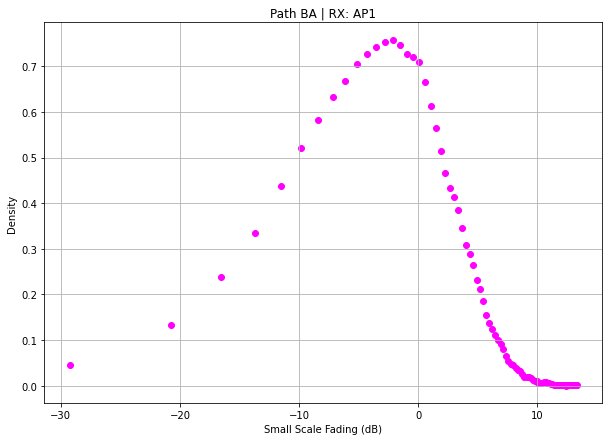

In [55]:
nAP = 'AP1'
estParameters_pathBA_ap1 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [56]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 13917)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 1889)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP1

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 43.36304569244385 seconds.

Best Fitness: 13975.442095121649
Best Gen: 9
Kappa: 0.1635297105872009
Mu: 1.0118153493918178
R_hat: 1.1660595818955963
Mt: 6.080376244551123
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP1

Satisfactory Threshold reached!
Elapsed time is 2.906942367553711 seconds.

Best Fitness: 1893.194955296154
Best Gen: 11
Kappa: 0.10194313749664076
Mu: 1.0338590811329578
R_hat: 1.1673399169868084
Mt: 5.811150669227606


#### Estimated Parameters

In [57]:
mle_sku_t3_pathBA_ap1 = [0.001, 1.0186, 1.1659, 6.1736]

estParameters_pathBA_ap1['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathBA_ap1
estParameters_pathBA_ap1['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathBA_ap1['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathBA_ap1 = estParameters_pathBA_ap1.set_index(index)
estParameters_pathBA_ap1

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,0.0010,0.163530,0.101943
mu,1.0186,1.011815,1.033859
r_hat,1.1659,1.166060,1.167340
mt,6.1736,6.080376,5.811151


#### Plots

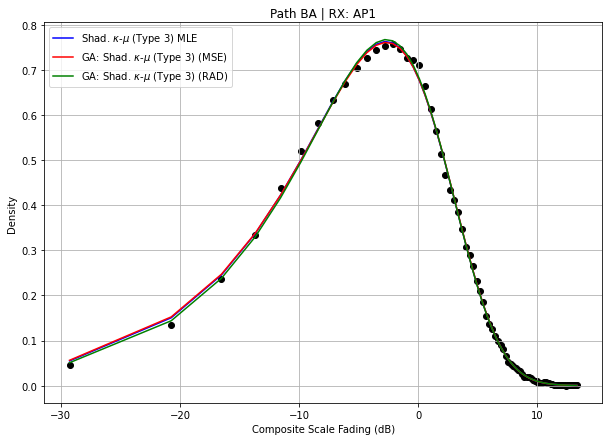

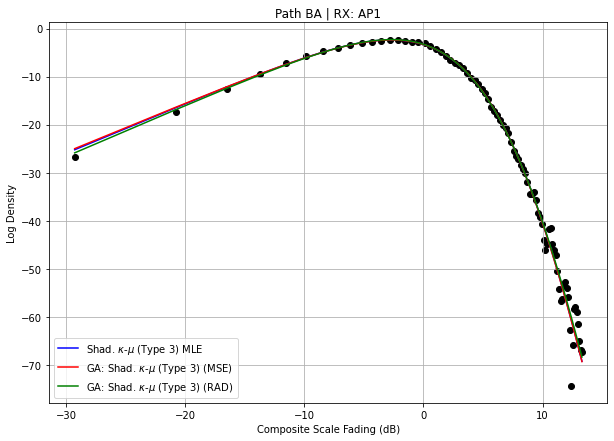

In [58]:
sku_t3_BA_ap1_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap1[0], mle_sku_t3_pathBA_ap1[1], mle_sku_t3_pathBA_ap1[2], mle_sku_t3_pathBA_ap1[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_BA_ap1_pdf,\
     estParameters_pathBA_ap1['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathBA_ap1['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [59]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap1 = computeAIC(data, n, K,\
                            mle_sku_t3_pathBA_ap1,\
                            estParameters_pathBA_ap1['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathBA_ap1['GA: Shad. KappaMu T3 - RAD'])

Path: BA
RX: AP1


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = RAD),32027.109411
1,MLE - Shad. KappaMu T3,32032.788642
2,GA - Shad. KappaMu T3 (Fitness = MSE),32036.128579


### AP 2

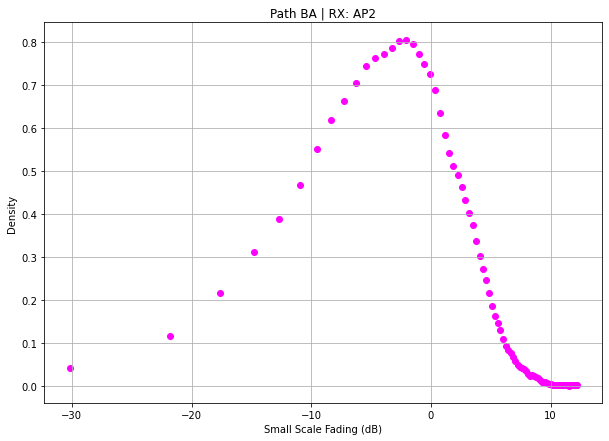

In [60]:
nAP = 'AP2'
estParameters_pathBA_ap2 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [61]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 7372)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 1382)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP2

Satisfactory Threshold reached!
Elapsed time is 6.0816521644592285 seconds.

Best Fitness: 7439.740918657798
Best Gen: 27
Kappa: 0.8039394180754411
Mu: 0.9753090886513811
R_hat: 1.1236376429103947
Mt: 4.500219452562197
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP2

Satisfactory Threshold reached!
Elapsed time is 3.738957643508911 seconds.

Best Fitness: 1391.2276196599773
Best Gen: 13
Kappa: 0.20263970365983888
Mu: 1.0368483035833085
R_hat: 1.0992356147418996
Mt: 8.455757608881905


#### Estimated Parameters

In [62]:
mle_sku_t3_pathBA_ap2 = [0.001, 1.0333, 1.1033, 8.6018]

estParameters_pathBA_ap2['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathBA_ap2
estParameters_pathBA_ap2['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathBA_ap2['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathBA_ap2 = estParameters_pathBA_ap2.set_index(index)
estParameters_pathBA_ap2

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,0.0010,0.803939,0.202640
mu,1.0333,0.975309,1.036848
r_hat,1.1033,1.123638,1.099236
mt,8.6018,4.500219,8.455758


#### Plots

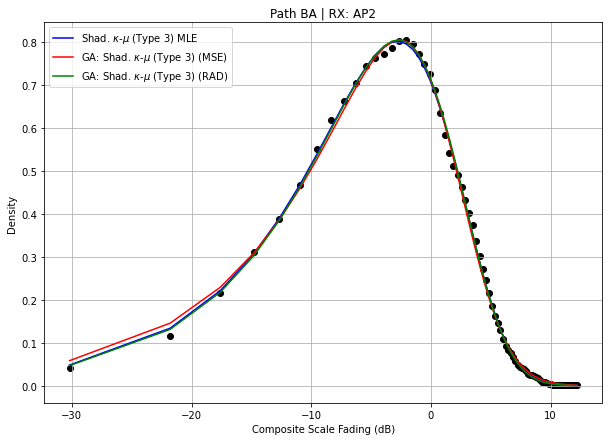

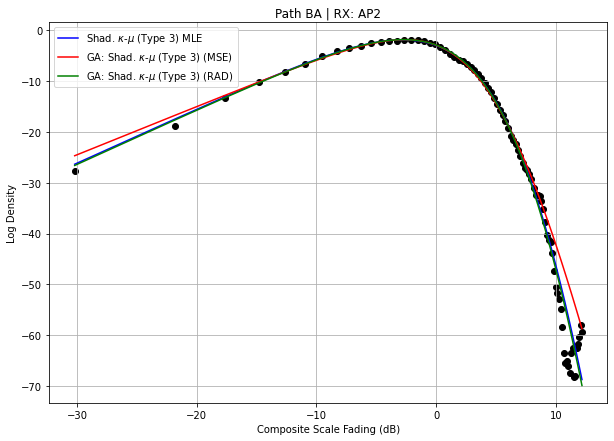

In [63]:
sku_t3_BA_ap2_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap2[0], mle_sku_t3_pathBA_ap2[1], mle_sku_t3_pathBA_ap2[2], mle_sku_t3_pathBA_ap2[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_BA_ap2_pdf,\
     estParameters_pathBA_ap2['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathBA_ap2['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [64]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap2 = computeAIC(data, n, K,\
                            mle_sku_t3_pathBA_ap2,\
                            estParameters_pathBA_ap2['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathBA_ap2['GA: Shad. KappaMu T3 - RAD'])

Path: BA
RX: AP2


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = RAD),28435.544989
1,MLE - Shad. KappaMu T3,28439.027990
2,GA - Shad. KappaMu T3 (Fitness = MSE),28535.167863


### AP 3

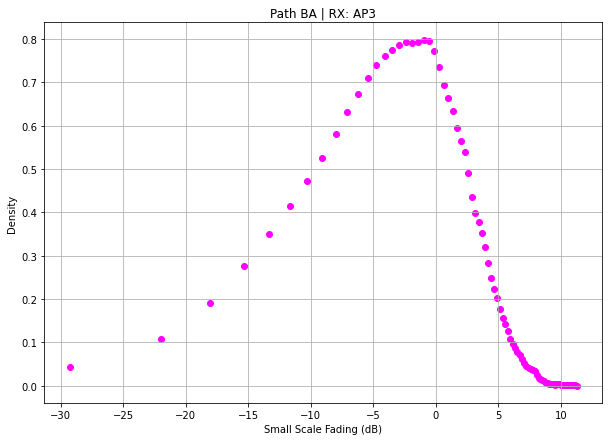

In [65]:
nAP = 'AP3'
estParameters_pathBA_ap3 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [66]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 16371)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 2182)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP3

Satisfactory Threshold reached!
Elapsed time is 2.7398548126220703 seconds.

Best Fitness: 16920.346648078536
Best Gen: 11
Kappa: 0.8013276101622285
Mu: 0.965398963525317
R_hat: 1.0863285518439334
Mt: 9.559956895716063
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP3

Satisfactory Threshold reached!
Elapsed time is 23.22321057319641 seconds.

Best Fitness: 2196.153249382871
Best Gen: 130
Kappa: 0.578980300215623
Mu: 1.022581843772519
R_hat: 1.0900471236695006
Mt: 10.079815249279436


#### Estimated Parameters

In [67]:
mle_sku_t3_pathBA_ap3 = [0.63795, 0.99672, 1.0865, 11.307]

estParameters_pathBA_ap3['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathBA_ap3
estParameters_pathBA_ap3['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathBA_ap3['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathBA_ap3 = estParameters_pathBA_ap3.set_index(index)
estParameters_pathBA_ap3

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,0.63795,0.801328,0.578980
mu,0.99672,0.965399,1.022582
r_hat,1.08650,1.086329,1.090047
mt,11.30700,9.559957,10.079815


#### Plots

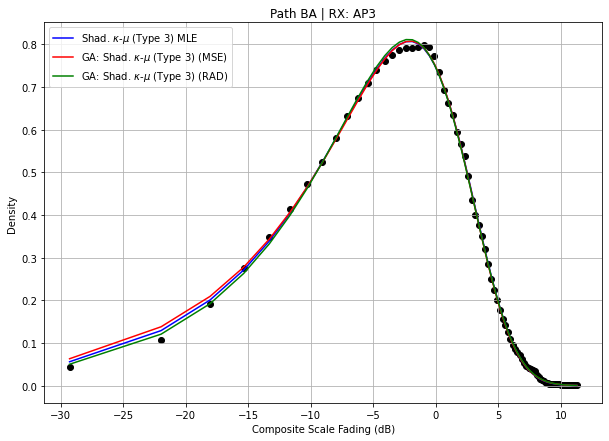

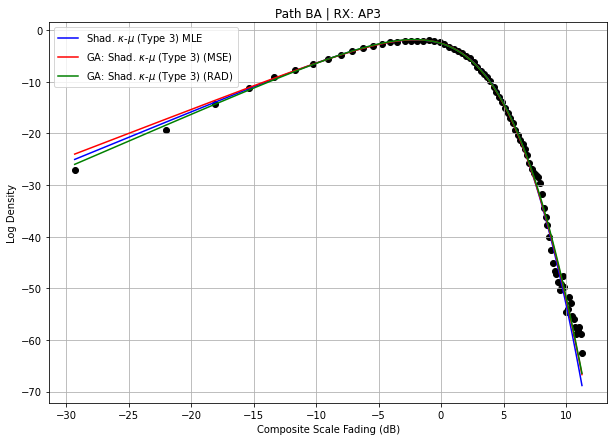

In [68]:
sku_t3_BA_ap3_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap3[0], mle_sku_t3_pathBA_ap3[1], mle_sku_t3_pathBA_ap3[2], mle_sku_t3_pathBA_ap3[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_BA_ap3_pdf,\
     estParameters_pathBA_ap3['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathBA_ap3['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [69]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap3 = computeAIC(data, n, K,\
                            mle_sku_t3_pathBA_ap3,\
                            estParameters_pathBA_ap3['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathBA_ap3['GA: Shad. KappaMu T3 - RAD'])

Path: BA
RX: AP3


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = RAD),26126.332827
1,MLE - Shad. KappaMu T3,26136.624964
2,GA - Shad. KappaMu T3 (Fitness = MSE),26150.325368


### AP 4

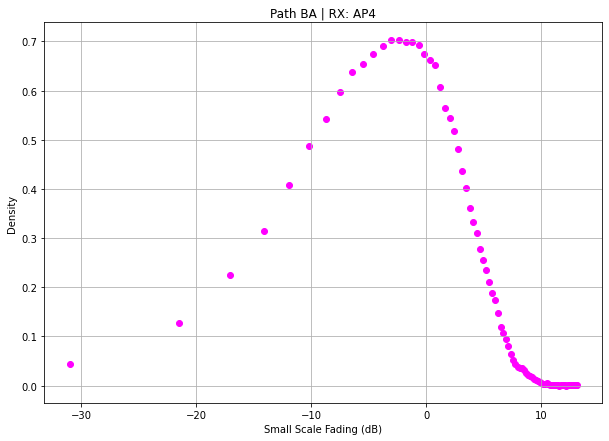

In [70]:
nAP = 'AP4'
estParameters_pathBA_ap4 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [71]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 12153)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 1267)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP4

Satisfactory Threshold reached!
Elapsed time is 1.8364737033843994 seconds.

Best Fitness: 12196.466517567522
Best Gen: 7
Kappa: 0.015689743050835064
Mu: 0.9337619980679314
R_hat: 1.1705326354990955
Mt: 28.060293071554234
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP4

Satisfactory Threshold reached!
Elapsed time is 5.700333595275879 seconds.

Best Fitness: 1267.1897738928315
Best Gen: 28
Kappa: 0.3331072071453193
Mu: 0.9589167659469218
R_hat: 1.1798932010669003
Mt: 11.02162936762258


#### Estimated Parameters

In [72]:
mle_sku_t3_pathBA_ap4 = [0.001, 0.94198, 1.1774, 18.948]

estParameters_pathBA_ap4['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathBA_ap4
estParameters_pathBA_ap4['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathBA_ap4['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathBA_ap4 = estParameters_pathBA_ap4.set_index(index)
estParameters_pathBA_ap4

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,0.00100,0.015690,0.333107
mu,0.94198,0.933762,0.958917
r_hat,1.17740,1.170533,1.179893
mt,18.94800,28.060293,11.021629


#### Plots

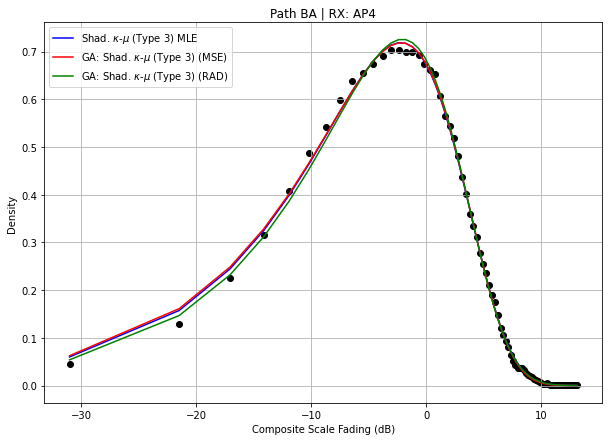

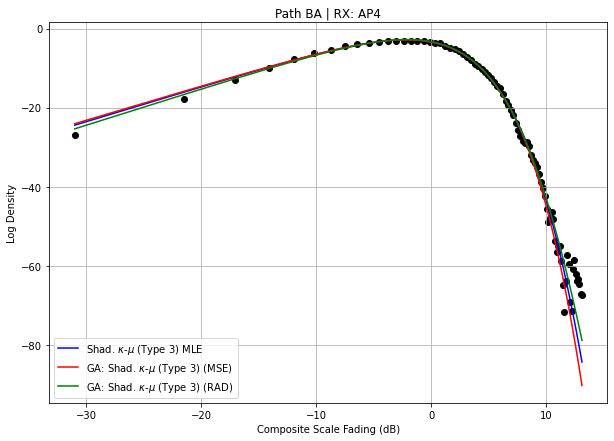

In [73]:
sku_t3_BA_ap4_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap4[0], mle_sku_t3_pathBA_ap4[1], mle_sku_t3_pathBA_ap4[2], mle_sku_t3_pathBA_ap4[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_BA_ap4_pdf,\
     estParameters_pathBA_ap4['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathBA_ap4['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [74]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap4 = computeAIC(data, n, K,\
                            mle_sku_t3_pathBA_ap4,\
                            estParameters_pathBA_ap4['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathBA_ap4['GA: Shad. KappaMu T3 - RAD'])

Path: BA
RX: AP4


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = RAD),31816.951979
1,MLE - Shad. KappaMu T3,31828.556746
2,GA - Shad. KappaMu T3 (Fitness = MSE),31843.031846


### AP 5

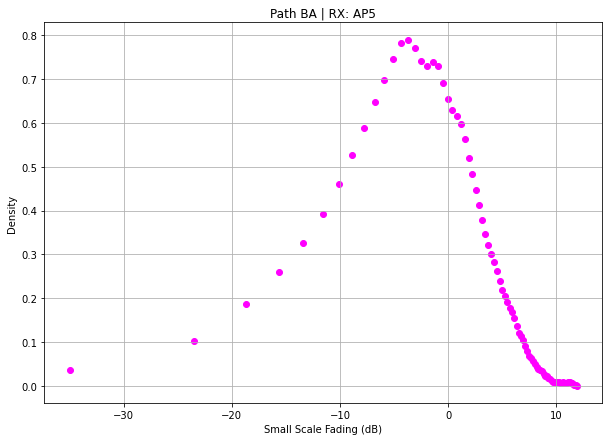

In [75]:
nAP = 'AP5'
estParameters_pathBA_ap5 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [76]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 8107)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 1007)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP5

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 248.66573643684387 seconds.

Best Fitness: 8111.381155614967
Best Gen: 9
Kappa: 0.08098607252120109
Mu: 1.0748312562395834
R_hat: 1.2239993258217616
Mt: 3.7143259695193773
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP5

Satisfactory Threshold reached!
Elapsed time is 11.697074890136719 seconds.

Best Fitness: 1007.5024371287682
Best Gen: 69
Kappa: 0.21126838060688033
Mu: 1.0202302568537145
R_h

#### Estimated Parameters

In [77]:
mle_sku_t3_pathBA_ap5 = [0.001, 1.0747, 1.2232, 3.7281]

estParameters_pathBA_ap5['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathBA_ap5
estParameters_pathBA_ap5['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathBA_ap5['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathBA_ap5 = estParameters_pathBA_ap5.set_index(index)
estParameters_pathBA_ap5

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,0.0010,0.080986,0.211268
mu,1.0747,1.074831,1.020230
r_hat,1.2232,1.223999,1.198623
mt,3.7281,3.714326,4.621477


#### Plots

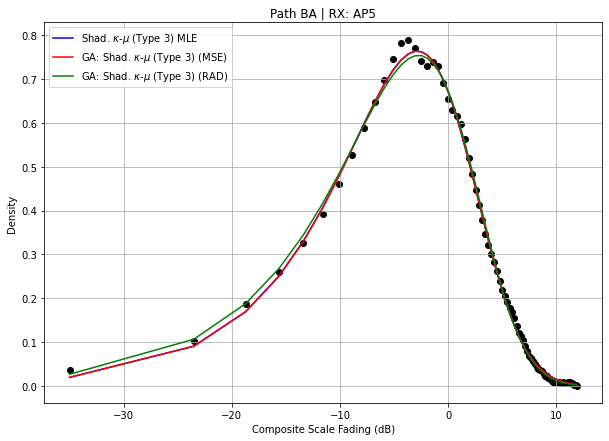

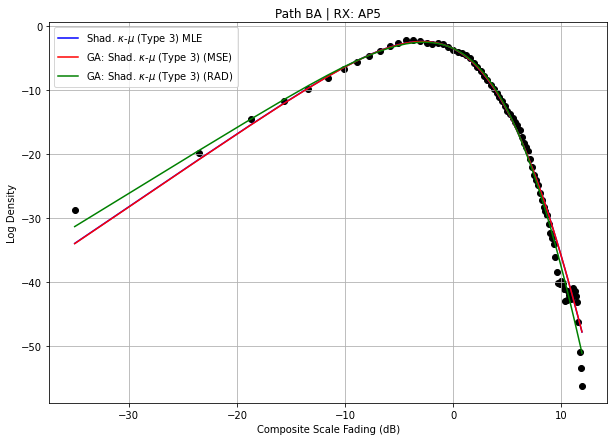

In [78]:
sku_t3_BA_ap5_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap5[0], mle_sku_t3_pathBA_ap5[1], mle_sku_t3_pathBA_ap5[2], mle_sku_t3_pathBA_ap5[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_BA_ap5_pdf,\
     estParameters_pathBA_ap5['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathBA_ap5['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [79]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap5 = computeAIC(data, n, K,\
                            mle_sku_t3_pathBA_ap5,\
                            estParameters_pathBA_ap5['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathBA_ap5['GA: Shad. KappaMu T3 - RAD'])

Path: BA
RX: AP5


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = RAD),31362.450769
1,MLE - Shad. KappaMu T3,31407.801528
2,GA - Shad. KappaMu T3 (Fitness = MSE),31408.451840


### AP 6

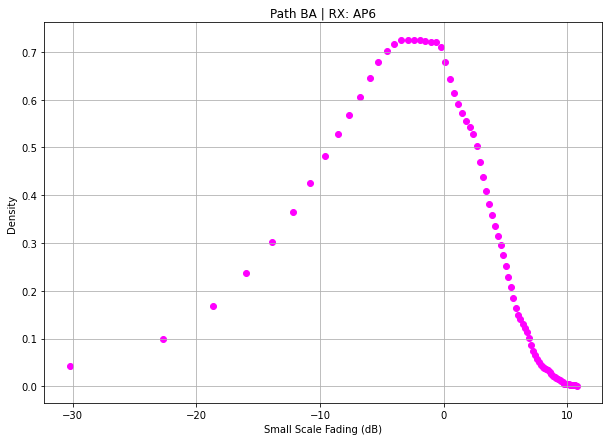

In [80]:
nAP = 'AP6'
estParameters_pathBA_ap6 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [82]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 12276)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 2400)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP6

Satisfactory Threshold reached!
Elapsed time is 1.6634652614593506 seconds.

Best Fitness: 12538.18409015432
Best Gen: 6
Kappa: 0.003808916243336572
Mu: 0.9892374884036951
R_hat: 1.1757628400654356
Mt: 14.919067080603027
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP6

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 46.060983657836914 seconds.

Best Fitness: 2402.461009713129
Best Gen: 44
Kappa: 0.16164955493904742
Mu: 0.995114170805798
R_hat: 1.175047120611788
Mt: 14.589514348538216


#### Estimated Parameters

In [83]:
mle_sku_t3_pathBA_ap6 = [0.001, 0.99714, 1.1846, 11.198]

estParameters_pathBA_ap6['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathBA_ap6
estParameters_pathBA_ap6['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathBA_ap6['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathBA_ap6 = estParameters_pathBA_ap6.set_index(index)
estParameters_pathBA_ap6

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,0.00100,0.003809,0.161650
mu,0.99714,0.989237,0.995114
r_hat,1.18460,1.175763,1.175047
mt,11.19800,14.919067,14.589514


#### Plots

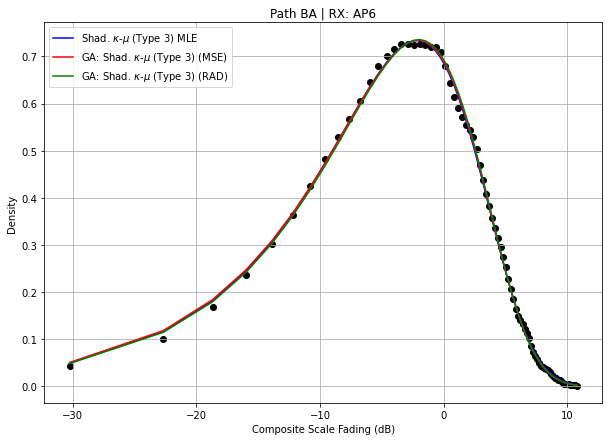

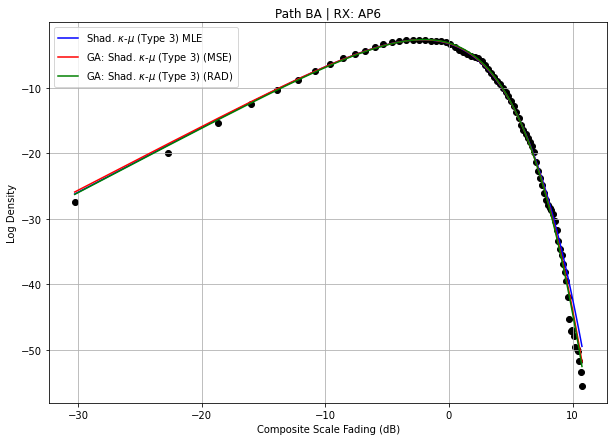

In [84]:
sku_t3_BA_ap6_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap6[0], mle_sku_t3_pathBA_ap6[1], mle_sku_t3_pathBA_ap6[2], mle_sku_t3_pathBA_ap6[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_BA_ap6_pdf,\
     estParameters_pathBA_ap6['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathBA_ap6['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [85]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap6 = computeAIC(data, n, K,\
                            mle_sku_t3_pathBA_ap6,\
                            estParameters_pathBA_ap6['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathBA_ap6['GA: Shad. KappaMu T3 - RAD'])

Path: BA
RX: AP6


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = RAD),30893.422145
1,GA - Shad. KappaMu T3 (Fitness = MSE),30899.617044
2,MLE - Shad. KappaMu T3,30920.555499


### AP 7

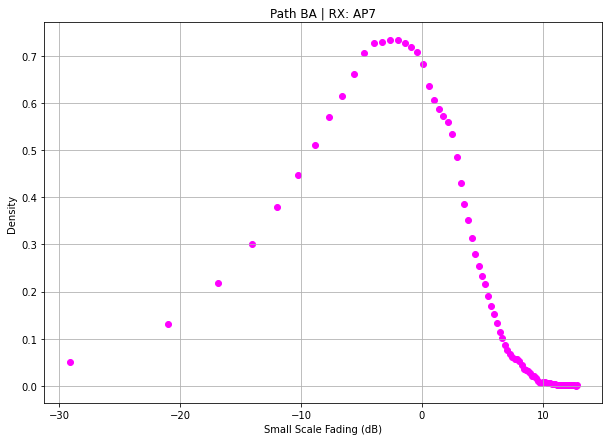

In [86]:
nAP = 'AP7'
estParameters_pathBA_ap7 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [87]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 11807)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 1857)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP7

Satisfactory Threshold reached!
Elapsed time is 25.4016375541687 seconds.

Best Fitness: 11832.922863999156
Best Gen: 122
Kappa: 0.42825679873344796
Mu: 0.9945171883431697
R_hat: 1.180795770257651
Mt: 6.826689333745611
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP7

Satisfactory Threshold reached!
Elapsed time is 33.28216743469238 seconds.

Best Fitness: 1863.8629486610712
Best Gen: 190
Kappa: 0.36639118381504854
Mu: 1.0075212119707257
R_hat: 1.182090924949932
Mt: 6.980836451152263


#### Estimated Parameters

In [88]:
mle_sku_t3_pathBA_ap7 = [0.23121, 1.0031, 1.1761, 8.7936]

estParameters_pathBA_ap7['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathBA_ap7
estParameters_pathBA_ap7['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathBA_ap7['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathBA_ap7 = estParameters_pathBA_ap7.set_index(index)
estParameters_pathBA_ap7

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,0.23121,0.428257,0.366391
mu,1.00310,0.994517,1.007521
r_hat,1.17610,1.180796,1.182091
mt,8.79360,6.826689,6.980836


#### Plots

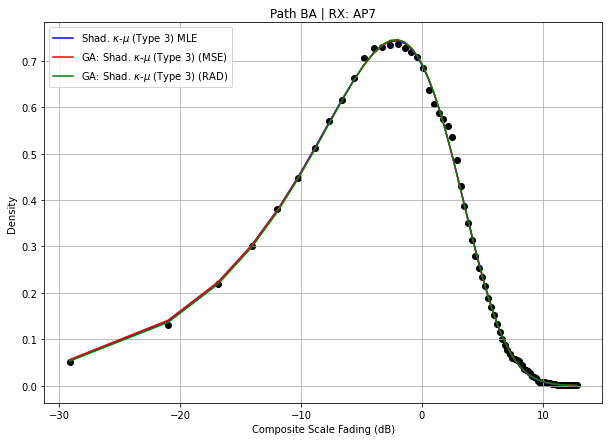

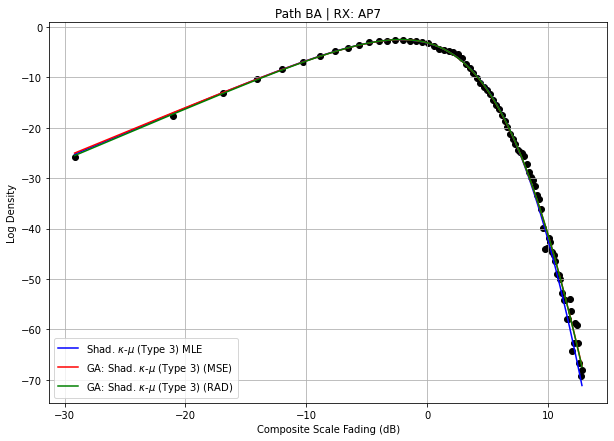

In [89]:
sku_t3_BA_ap7_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap7[0], mle_sku_t3_pathBA_ap7[1], mle_sku_t3_pathBA_ap7[2], mle_sku_t3_pathBA_ap7[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_BA_ap7_pdf,\
     estParameters_pathBA_ap7['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathBA_ap7['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [90]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap7 = computeAIC(data, n, K,\
                            mle_sku_t3_pathBA_ap7,\
                            estParameters_pathBA_ap7['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathBA_ap7['GA: Shad. KappaMu T3 - RAD'])

Path: BA
RX: AP7


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = RAD),32309.520156
1,MLE - Shad. KappaMu T3,32312.331832
2,GA - Shad. KappaMu T3 (Fitness = MSE),32313.966580


### AP 8

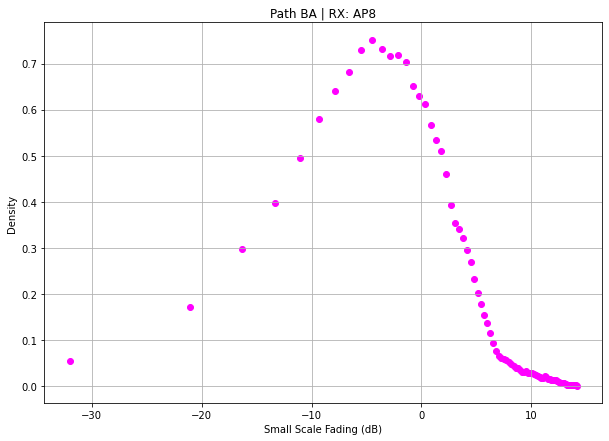

In [91]:
nAP = 'AP8'
estParameters_pathBA_ap8 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [92]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 8642)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 403)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP8

Satisfactory Threshold reached!
Elapsed time is 17.4137864112854 seconds.

Best Fitness: 8642.493040912146
Best Gen: 86
Kappa: 0.23498932813799842
Mu: 0.9619879588788305
R_hat: 1.2404977586452777
Mt: 3.091586088254945
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP8

Satisfactory Threshold reached!
Elapsed time is 24.076754331588745 seconds.

Best Fitness: 403.0680210352447
Best Gen: 129
Kappa: 0.7325130113732328
Mu: 0.9579909136658857
R_hat: 1.3099205647458896
Mt: 2.2046913662588667


#### Estimated Parameters

In [93]:
mle_sku_t3_pathBA_ap8 = [0.10842, 0.96613, 1.2382, 3.2039]

estParameters_pathBA_ap8['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathBA_ap8
estParameters_pathBA_ap8['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathBA_ap8['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathBA_ap8 = estParameters_pathBA_ap8.set_index(index)
estParameters_pathBA_ap8

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,0.10842,0.234989,0.732513
mu,0.96613,0.961988,0.957991
r_hat,1.23820,1.240498,1.309921
mt,3.20390,3.091586,2.204691


#### Plots

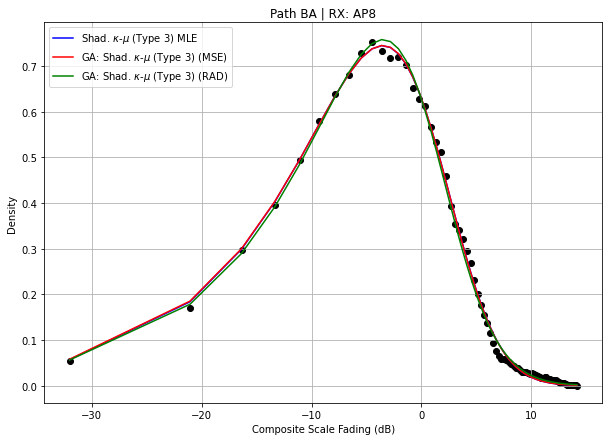

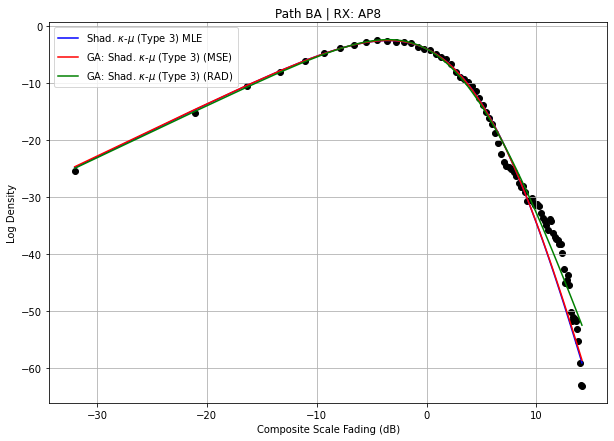

In [94]:
sku_t3_BA_ap8_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap8[0], mle_sku_t3_pathBA_ap8[1], mle_sku_t3_pathBA_ap8[2], mle_sku_t3_pathBA_ap8[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_BA_ap8_pdf,\
     estParameters_pathBA_ap8['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathBA_ap8['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [95]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap8 = computeAIC(data, n, K,\
                            mle_sku_t3_pathBA_ap8,\
                            estParameters_pathBA_ap8['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathBA_ap8['GA: Shad. KappaMu T3 - RAD'])

Path: BA
RX: AP8


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = RAD),34893.664418
1,GA - Shad. KappaMu T3 (Fitness = MSE),34901.390293
2,MLE - Shad. KappaMu T3,34905.643049


### AP 9

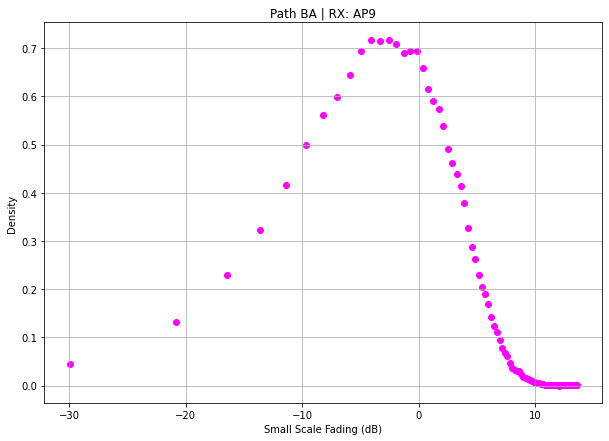

In [96]:
nAP = 'AP9'
estParameters_pathBA_ap9 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [97]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, mt_mse = geneticAlgorithm_sku(Xdata, Ydata, 11693)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, mt_rad = geneticAlgorithm_sku(Xdata, Ydata, 1097)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP9

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 88.78054237365723 seconds.

Best Fitness: 11694.79676354299
Best Gen: 42
Kappa: 0.08906724826001497
Mu: 0.9672198616477932
R_hat: 1.1825540126331693
Mt: 12.594877003544967
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP9

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 42.64956331253052 seconds.

Best Fitness: 1196.757568170659
Best Gen: 8
Kappa: 0.31475862127426424
Mu: 0.9804926862467017
R_hat: 1.1671506451555793
Mt: 12.689550441997506


#### Estimated Parameters

In [98]:
mle_sku_t3_pathBA_ap9 = [0.001, 0.96584, 1.1825, 13.223]

estParameters_pathBA_ap9['MLE - Shad. KappaMu T3'] = mle_sku_t3_pathBA_ap9
estParameters_pathBA_ap9['GA: Shad. KappaMu T3 - MSE'] = kappa_mse, mu_mse, r_hat_mse, mt_mse
estParameters_pathBA_ap9['GA: Shad. KappaMu T3 - RAD'] = kappa_rad, mu_rad, r_hat_rad, mt_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'mt'])
estParameters_pathBA_ap9 = estParameters_pathBA_ap9.set_index(index)
estParameters_pathBA_ap9

,MLE - Shad. KappaMu T3,GA: Shad. KappaMu T3 - MSE,GA: Shad. KappaMu T3 - RAD
kappa,0.00100,0.089067,0.314759
mu,0.96584,0.967220,0.980493
r_hat,1.18250,1.182554,1.167151
mt,13.22300,12.594877,12.689550


#### Plots

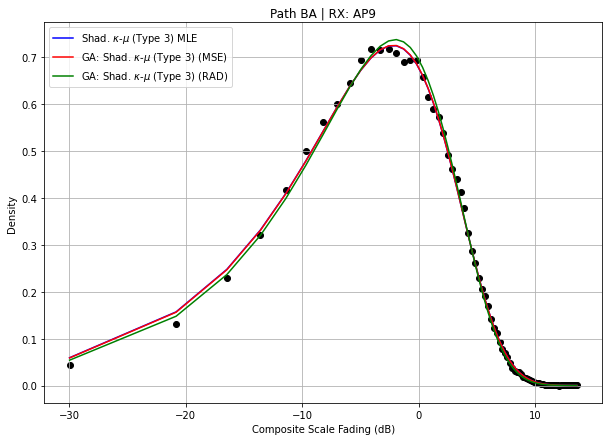

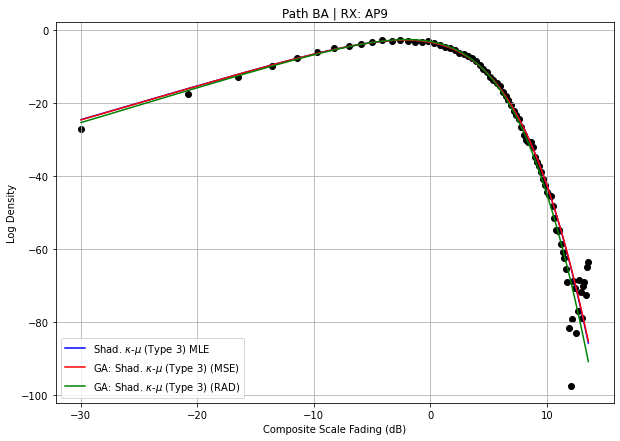

In [99]:
sku_t3_BA_ap9_pdf = shadowedKappaMuPDF_t3(Xdata, mle_sku_t3_pathBA_ap9[0], mle_sku_t3_pathBA_ap9[1], mle_sku_t3_pathBA_ap9[2], mle_sku_t3_pathBA_ap9[3])

plotResults(Xdata,\
     Ydata,\
     sku_t3_BA_ap9_pdf,\
     estParameters_pathBA_ap9['GA: Shad. KappaMu T3 - MSE'],\
     estParameters_pathBA_ap9['GA: Shad. KappaMu T3 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [100]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap9 = computeAIC(data, n, K,\
                            mle_sku_t3_pathBA_ap9,\
                            estParameters_pathBA_ap9['GA: Shad. KappaMu T3 - MSE'],\
                            estParameters_pathBA_ap9['GA: Shad. KappaMu T3 - RAD'])

Path: BA
RX: AP9


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T3 (Fitness = RAD),31342.263395
1,GA - Shad. KappaMu T3 (Fitness = MSE),31344.911329
2,MLE - Shad. KappaMu T3,31345.788165
